In [14]:
import json
import numpy as np
import scipy
from rouge import *
import matplotlib.pyplot as plt
import pickle
from scipy.special import softmax
from IPython.core.display import display, HTML 
import codecs
display(HTML("<style>.container { width:100% !important; }</style>"))


In [12]:
rouge_scores = np.load("rouge_full.npy")
rouge_meta = json.load(open("rouge_meta.json"))
input_meta = pickle.load(open("./data/attention_weights/save_dict" ,"rb"))
attention_weights = pickle.load(open('r.p','rb'))


input_paragraph_path = "data/MultiNews_data_tfidf_paddle_paragraph_small/test/MultiNews.30.test.0.json"
input_paragraphs = json.load(open(input_paragraph_path))

can_path = "results/graphsum_multinews/test_final_preds.candidate"
candidates = codecs.open(can_path, encoding="utf-8")
candidates = [line.strip() for line in candidates]


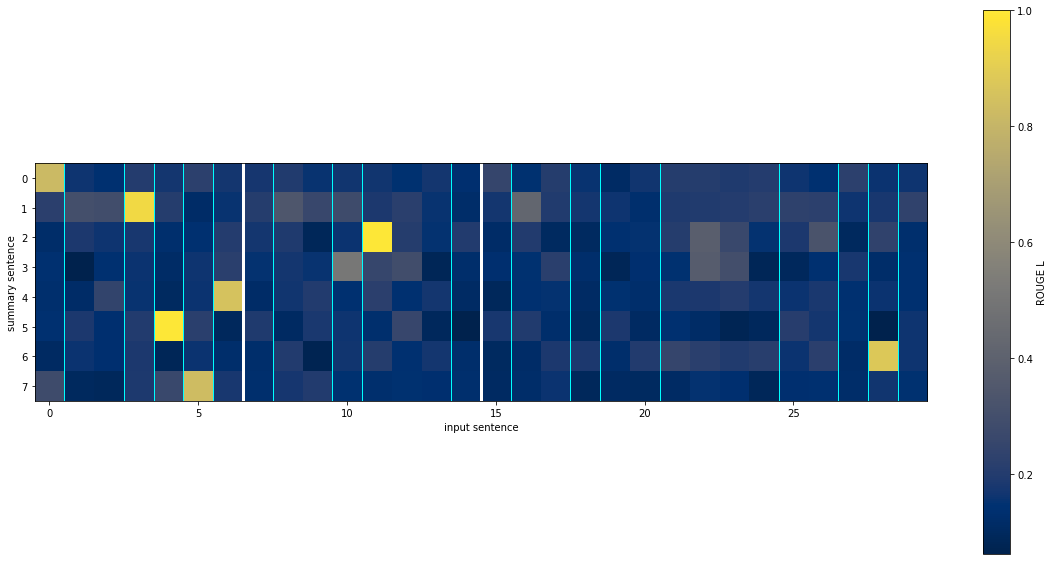

In [13]:
plot_rouge(rouge_scores, 7, input_meta, rouge_meta, score=2, cmap="cividis")

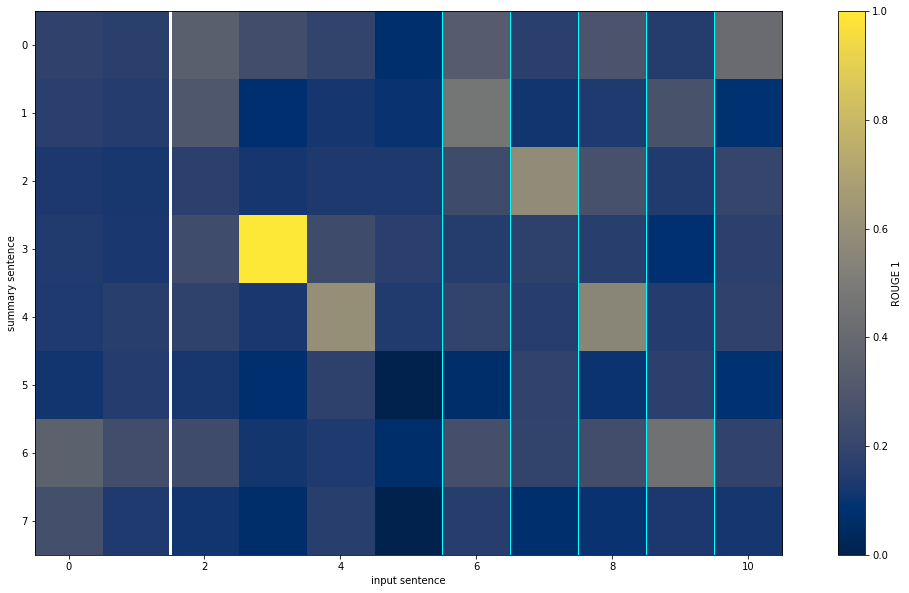

Input paragraphs:
--------------------
['starting in 1996 , alexa internet has been donating their crawl data to the internet archive . flowing in every day , these data are added to the wayback machine after an embargo period .', 'st. paul \' s top 3 dive bars " best burger in town . really , it \' s that amazing . not a huge place , so don \' t bring your whole extended family with you . "', "wcco viewers ' choice for best egg roll in minnesotain this week ’ s best of minnesota , the tastiest egg rolls can be found at a popular neighborhood restaurant in northeast minneapolis called que viet .", "derusha eats : the sunshine factory burns bright in plymouththe sunshine factory opened in new hope in 1976 , and everything about it screamed the ' 70s .", "minneapolis moonshine : 5 of the city ' s top distillerieswe crunched the numbers to find the top distilleries in minneapolis , to help you find the best spots to meet your needs .", "artsy deals worth seeking out in st. paul this weekl

In [15]:

plot_rouge(rouge_scores, 8, input_meta, rouge_meta, score=0, cmap="cividis")

e = 8
paragraphs = input_paragraphs[e]["src_str"][:]
print(f"Input paragraphs:\n--------------------\n{paragraphs}")
print("\n")
print(f"Generated summary:\n--------------------\n{candidates[e]}")
print("\n")

gold_path = "results/graphsum_multinews/test_final_preds.gold"
golds = codecs.open(gold_path, encoding="utf-8")
golds = [line.strip() for line in golds]
print(f"Gold standard:\n--------------------\n{golds[e]}")

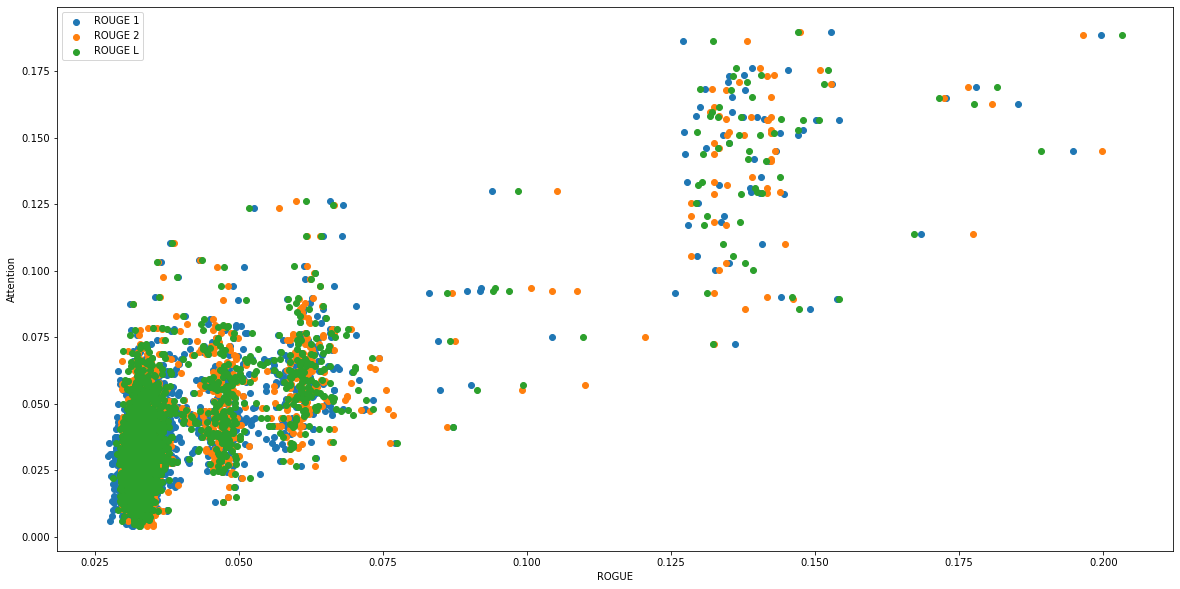

In [16]:
plot_attention_rouge_correlation(rouge_scores, rouge_meta, attention_weights, attention_dec=7, attention_mh=7,
                                     attention_metric="Mean", aggregate_function=np.mean)

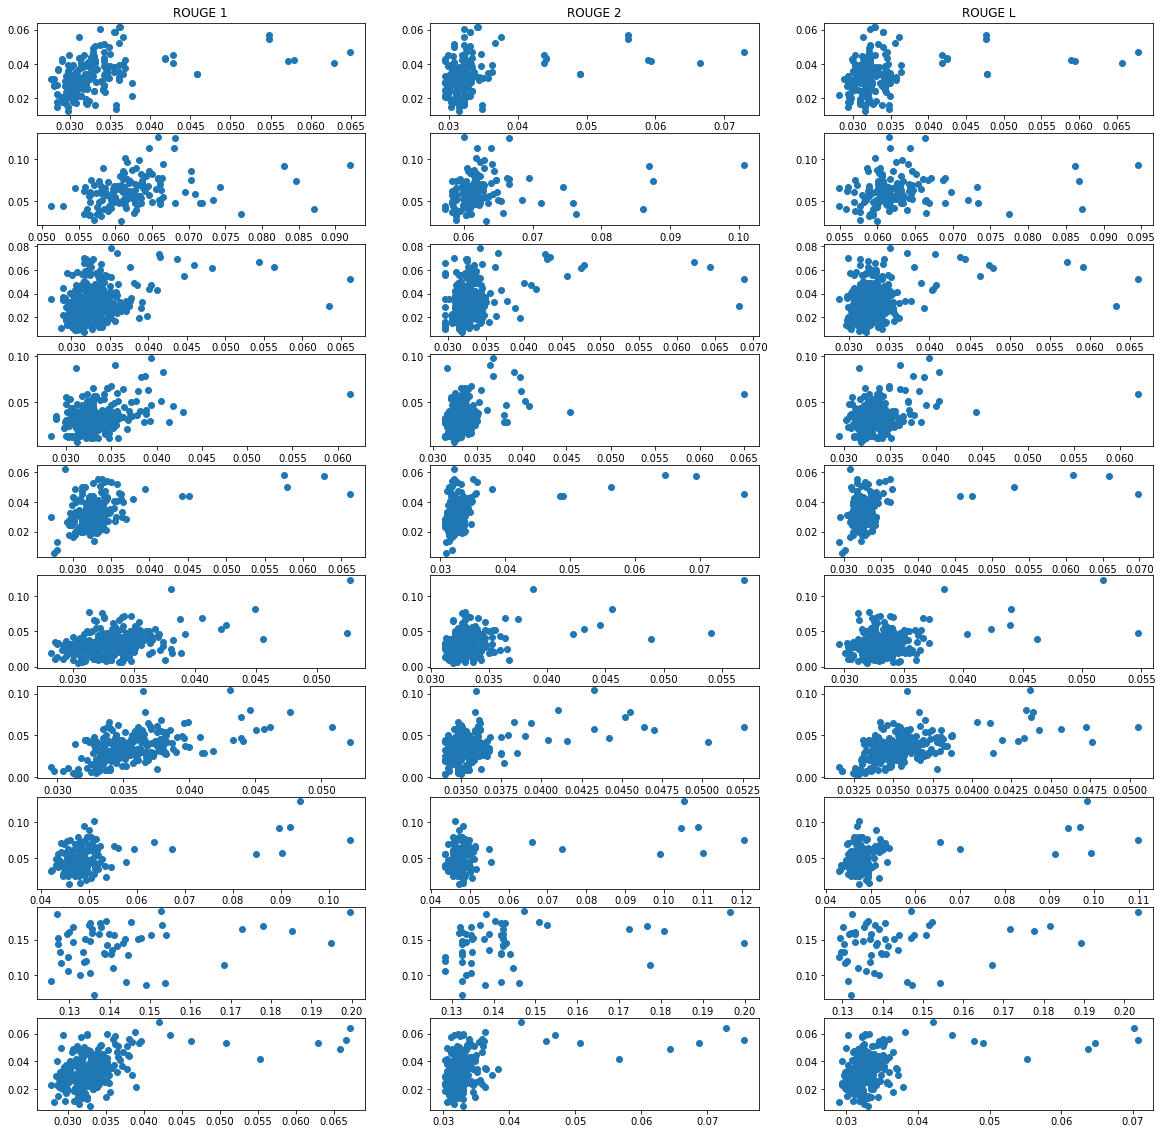

In [17]:
plot_attention_rouge_correlation_all_examples(rouge_scores, rouge_meta, attention_weights, attention_dec=7,
                                                  attention_mh=7, attention_metric="Mean", aggregate_function=np.mean)